<a href="https://colab.research.google.com/github/guilhermelaviola/InterMilan/blob/main/CurrentSquad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-1-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [ ]:
# Importing and displaying the last 10 goals scored:
df = pd.ExcelFile('INTER.xlsx')
players = pd.read_excel(df, 'All Players')
players.tail(10)

,Number,Continent,Nationality,Position,Player,Year joined,Club President,Manager
1168,16,Europe,Italy,Midfielder,Davide Frattesi,2023,Steven Zhang,Simone Inzaghi
1169,77,Europe,Italy,Goalkeeper,Emil Audero,2023,Steven Zhang,Simone Inzaghi
1170,30,South America,Brazil,Midfielder,Carlos Augusto,2023,Steven Zhang,Simone Inzaghi
1171,28,Europe,France,Defender,Benjamin Pavard,2023,Steven Zhang,Simone Inzaghi
1172,9,Europe,France,Attacker,Marcus Thuram,2023,Steven Zhang,Simone Inzaghi
1173,14,Europe,Netherlands,Midfielder,Davy Klaassen,2023,Steven Zhang,Simone Inzaghi
1174,7,South America,Colombia,Midfielder,Juan Cuadrado,2023,Steven Zhang,Simone Inzaghi
1175,17,North America,Canada,Midfielder,Tajon Buchanan,2023,Steven Zhang,Simone Inzaghi
1176,31,Europe,Germany,Defender,Yann Aurel Bisseck,2023,Steven Zhang,Simone Inzaghi
1177,1,Europe,Switzerland,Goalkeeper,Yann Sommer,2023,Steven Zhang,Simone Inzaghi


In [ ]:
# Displaying the number of rows and columns in the dataset:
players.shape

(1178, 8)

# **Plotting basic column data**

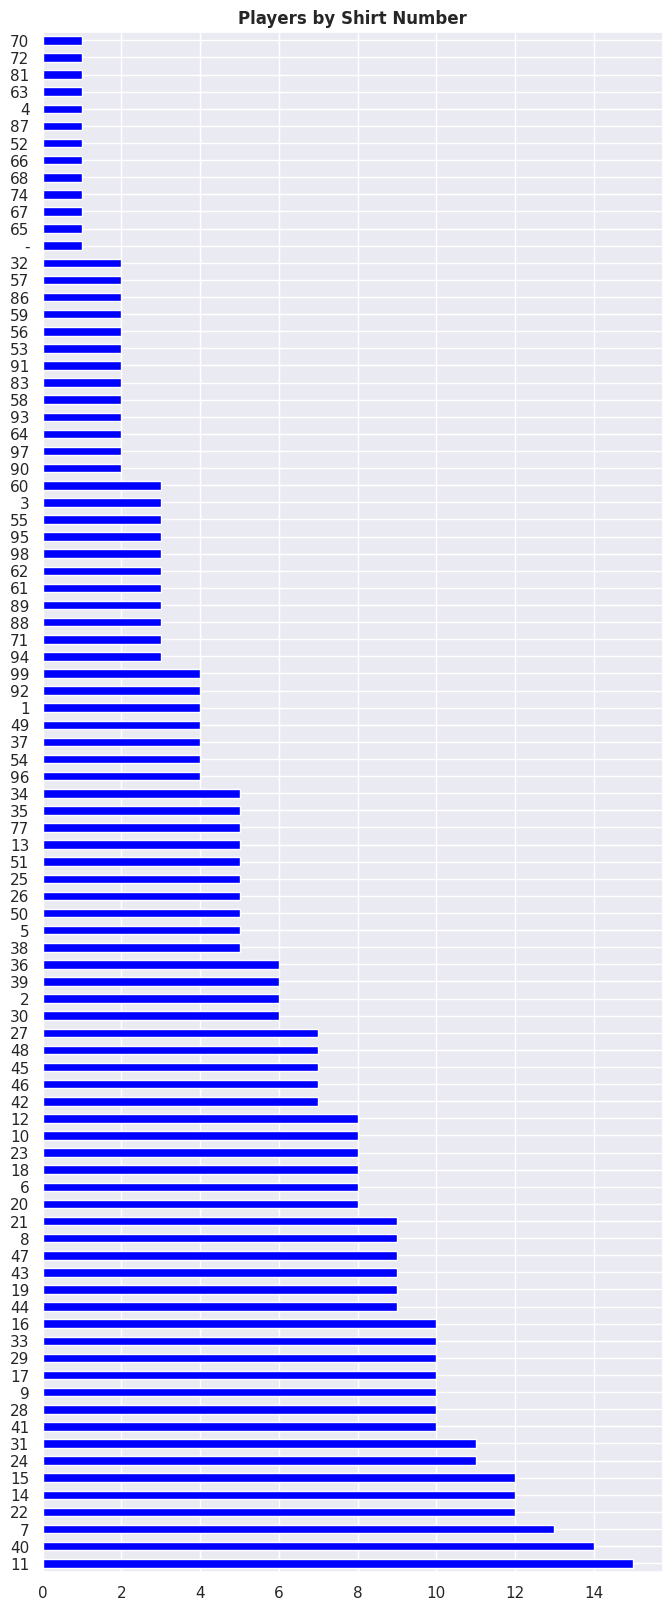

In [ ]:
# Displaying players by shirt number:
players['Number'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Players by Shirt Number', fontweight = 'bold')
plt.show()

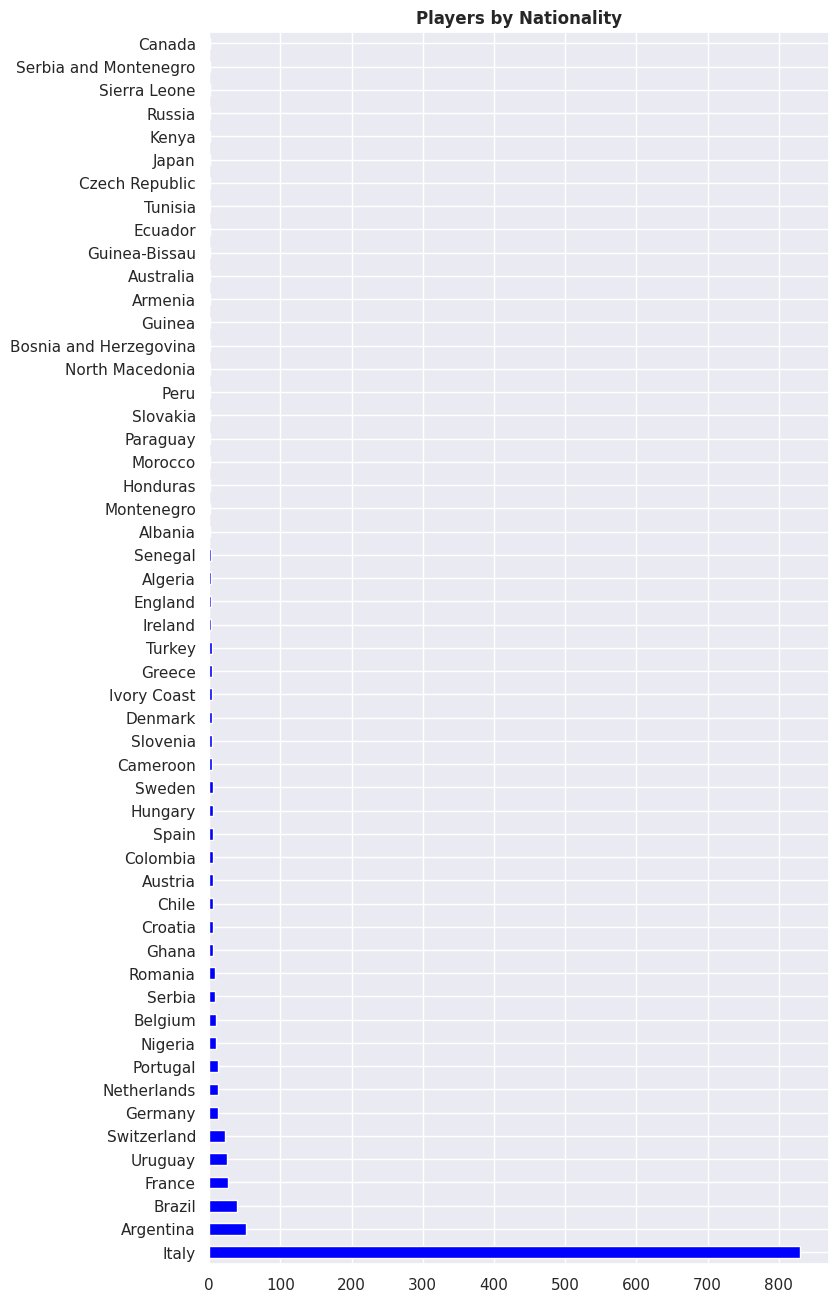

In [ ]:
# Displaying players by nationality:
players['Nationality'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Players by Nationality', fontweight = 'bold')
plt.show()

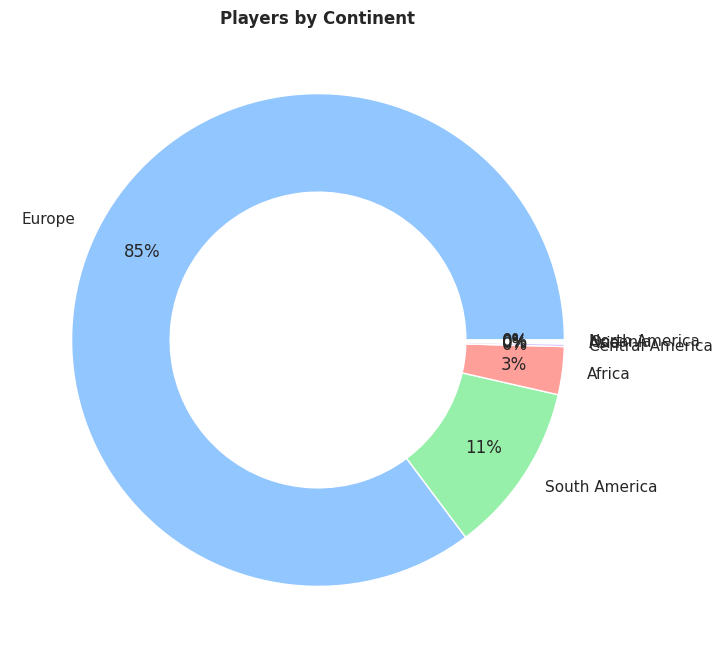

In [ ]:
# Displaying players by continent:
players['Continent'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by Continent', fontweight = 'bold')
plt.show()

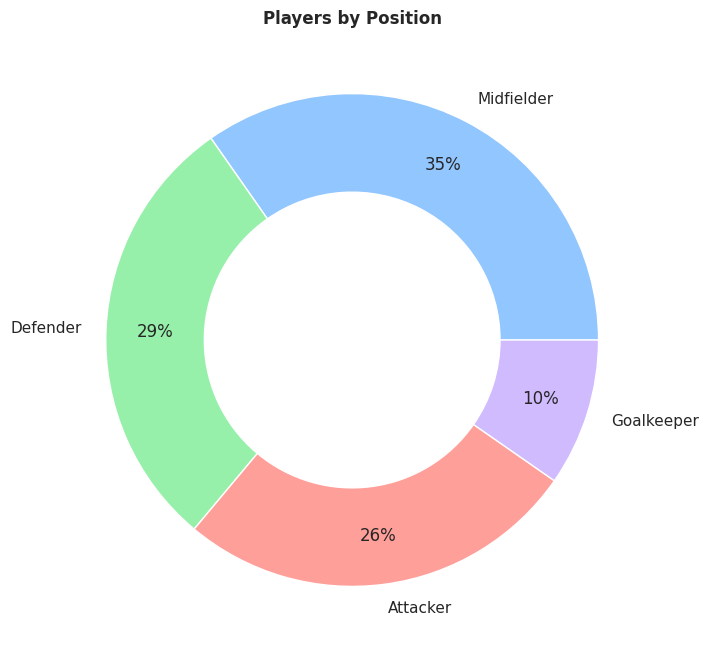

In [ ]:
# Displaying players by position:
players['Position'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Players by Position', fontweight = 'bold')
plt.show()

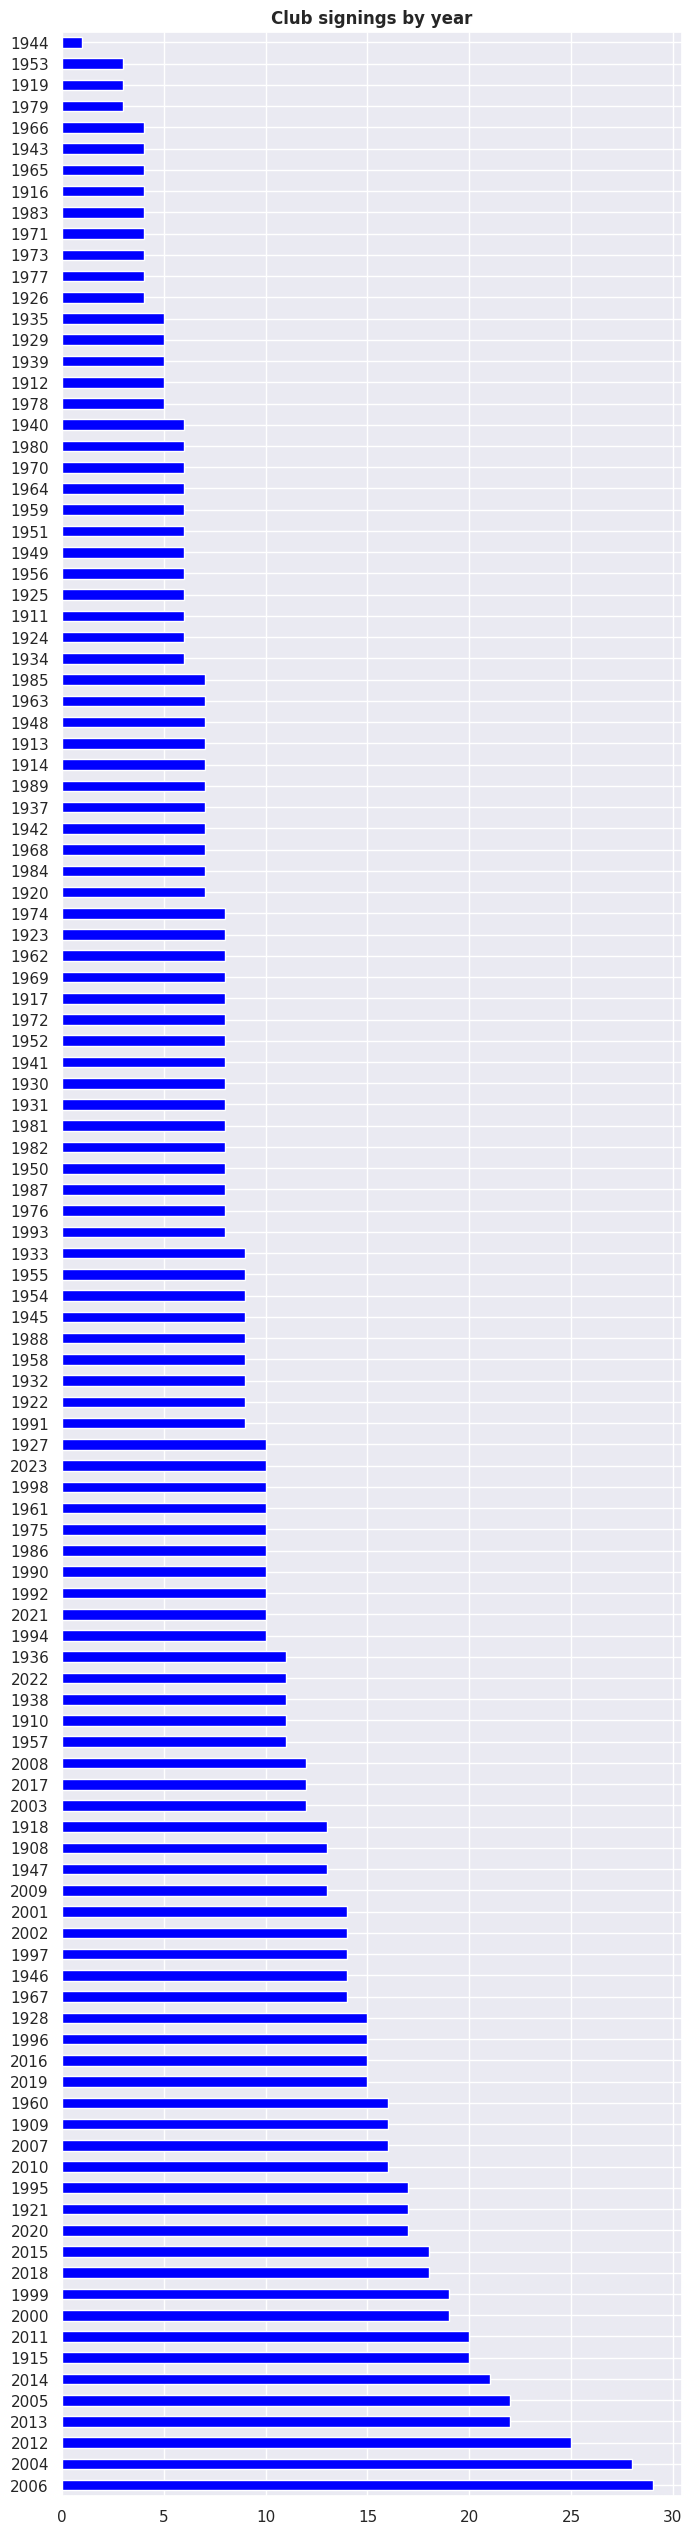

In [ ]:
# Displaying players by the year they joined the club:
players['Year joined'].value_counts().plot(kind = 'barh', color = 'blue', figsize = (8, 32))
plt.ylabel(None)
plt.title('Club signings by year', fontweight = 'bold')
plt.show()

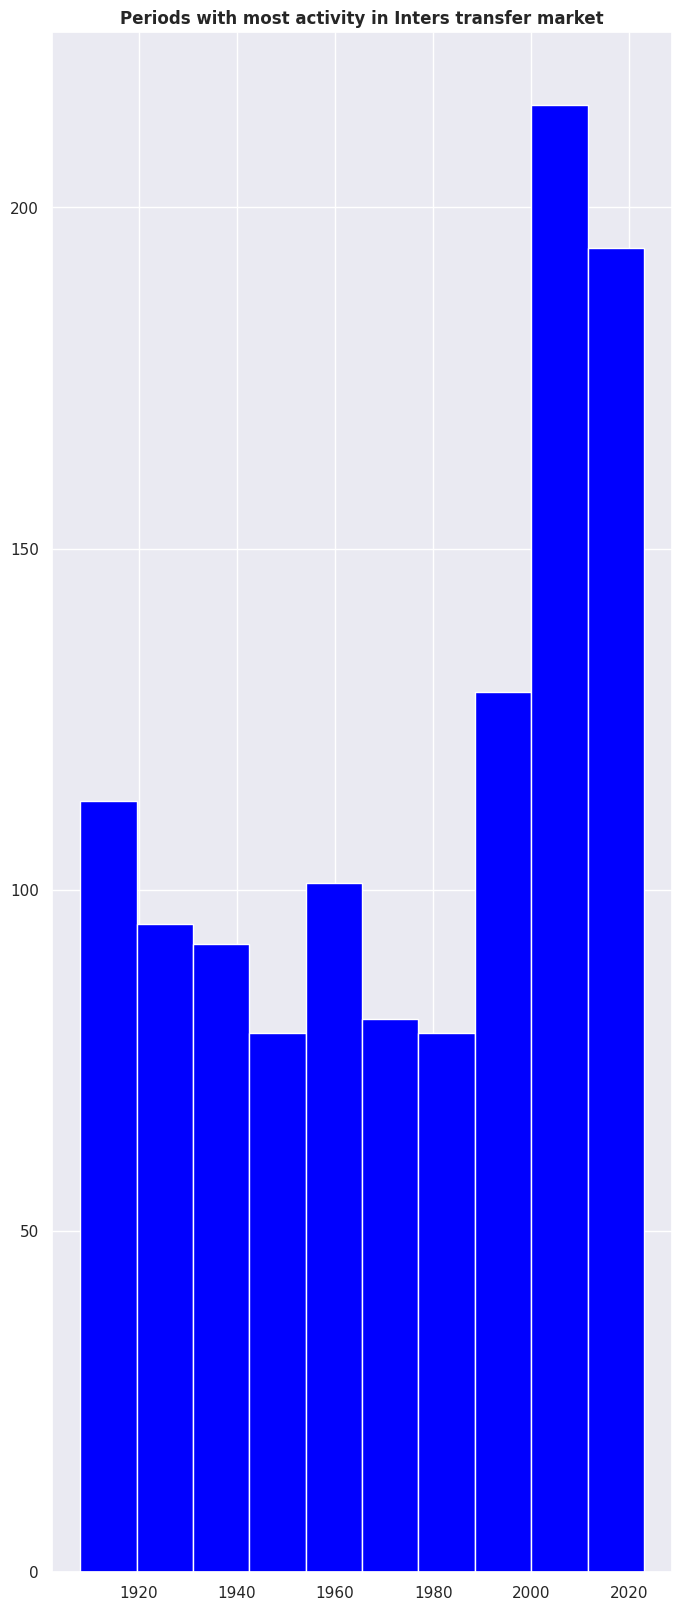

In [ ]:
# Displaying players by shirt number:
players['Year joined'].plot(kind = 'hist', color = 'blue', figsize = (8, 20))
plt.ylabel(None)
plt.title('Periods with most activity in Inters transfer market', fontweight = 'bold')
plt.show()

# **Plotting Inter presidents and managers who most signed players**

In [ ]:
# Converting the Club president column data into string:
players['Club President'] = players['Club President'].astype(str)

# Splitting the managers names by comma and removing leading spaces:
players['Club President'] = players['Club President'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
players = players.explode('Club President')

# Counting Matrix using crosstab method:
president_counts = pd.crosstab(index = players.index, columns = players['Club President'], margins = False).to_dict('index')
president_counts = pd.DataFrame(president_counts)

# Counting the number of 0s and 1s in each row:
president_counts_final = (president_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [ ]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
president_counts_final = pd.DataFrame(president_counts_final.tolist(), index = president_counts_final.index, columns = ['False', 'True'])
print(president_counts_final)

                              False  True
Angelo Moratti                 1061   117
Carlo De Medici                1156    22
Carlo Masseroni                1074   104
Emilio Hirzel                  1166    12
Enrico Olivetti                1154    24
Erick Thohir                   1072   106
Ernesto Pellegrini             1066   112
Ernesto Torrusio               1158    20
Ettore Strauss                 1151    27
Ferdinando Pozzani             1086    92
Francesco Mauro                1137    41
Giacinto Facchetti             1099    79
Giorgio Hulss                  1168    10
Giovanni Paramithiotti         1149    29
Giuseppe Visconti Di Modrone   1123    55
Ivanoe Fraizzoli               1070   108
Luigi Ansbacher                1164    14
Massimo Moratti                 863   315
Oreste Simonotti               1157    21
Senatore Borletti              1149    29
Steven Zhang                   1097    81


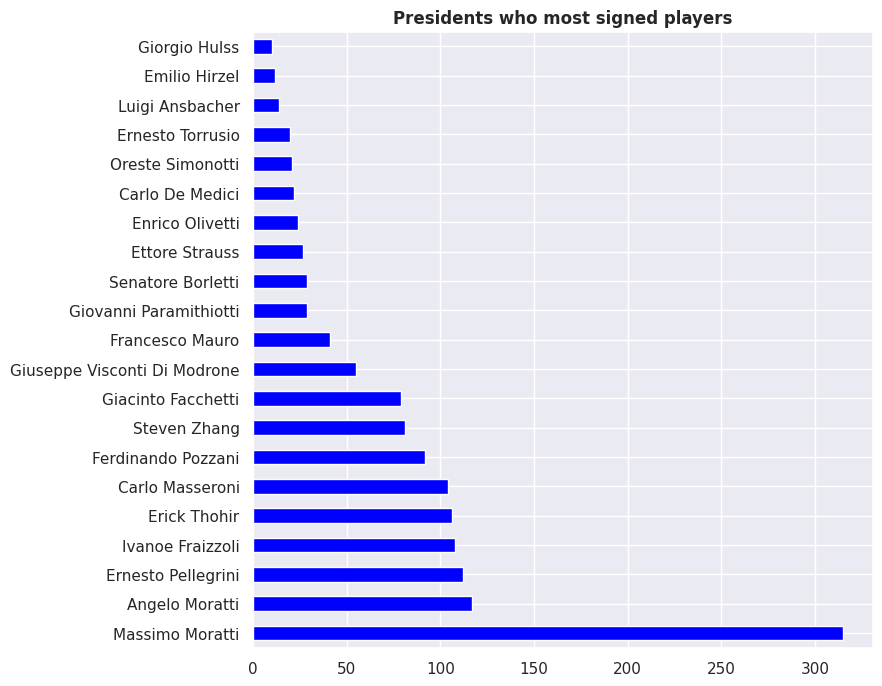

In [ ]:
# Displaying Inter presidents who most signed players:
president_counts_final['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'blue', figsize = (8, 8))
plt.ylabel(None)
plt.title('Presidents who most signed players', fontweight = 'bold')
plt.show()

In [ ]:
# Converting the Manager column data into string:
players['Manager'] = players['Manager'].astype(str)

# Splitting the managers names by comma and removing leading spaces:
players['Manager'] = players['Manager'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
players = players.explode('Manager')

# Counting Matrix using crosstab method:
manager_counts = pd.crosstab(index = players.index, columns = players['Manager'], margins = False).to_dict('index')
manager_counts = pd.DataFrame(manager_counts)

# Counting the number of 0s and 1s in each row:
manager_counts_final = (manager_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [ ]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
manager_counts_final = pd.DataFrame(manager_counts_final.tolist(), index = manager_counts_final.index, columns = ['False', 'True'])
print(manager_counts_final)

                    False  True
Alberto Zaccheroni   1138    12
Albino Carraro       1167    11
Aldo Campatelli      1169     0
Aldo Campattelli     1156    22
Aldo Olivieri        1156    22
...                   ...   ...
Virgilio Fossatti    1093    39
Walter Mazzarri      1135    21
nan                  1135    43
Árpad Weisz          1172     6
Árpád Weisz          1110    36

[69 rows x 2 columns]


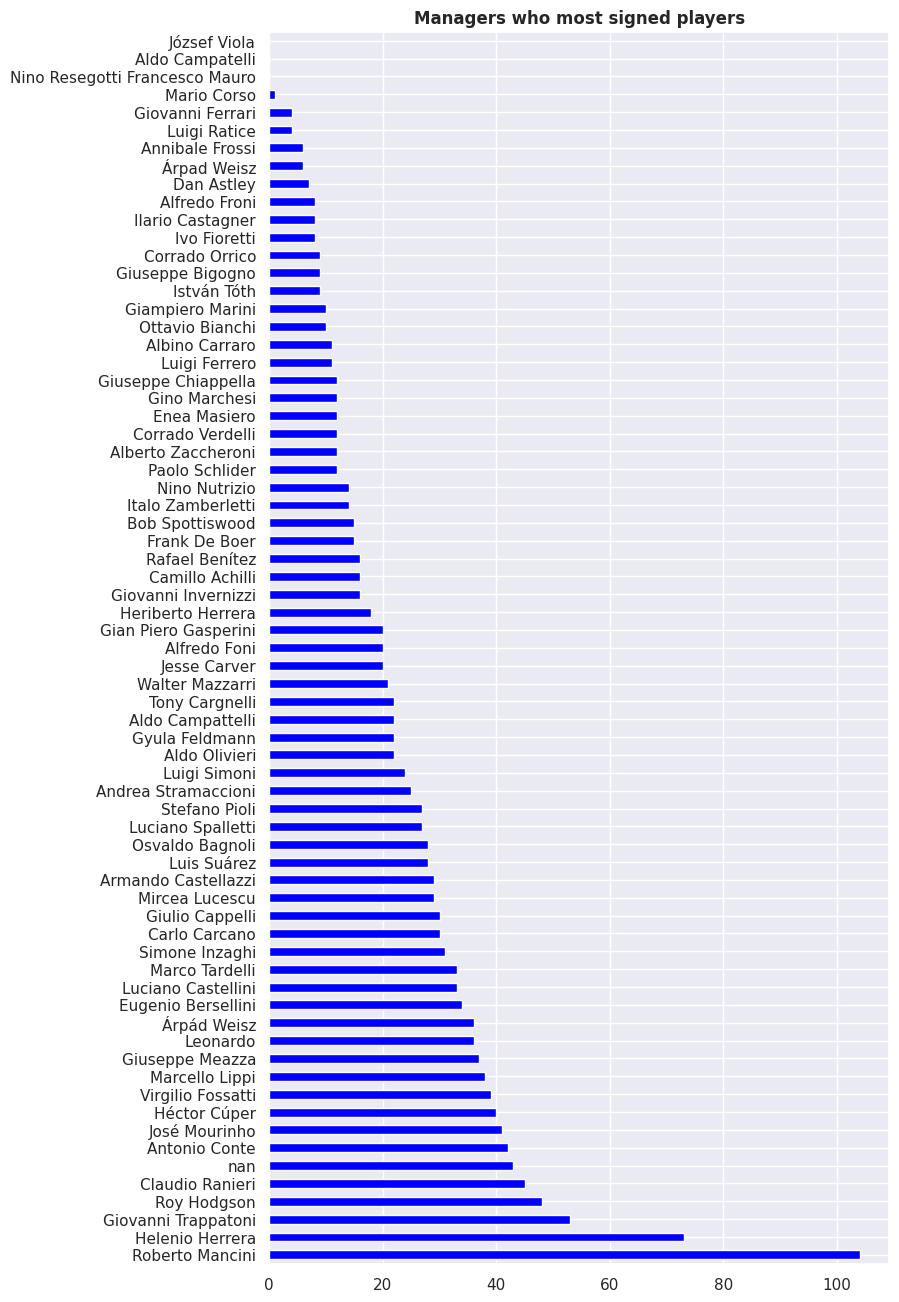

In [ ]:
# Displaying Inter managers who most signed players:
manager_counts_final['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'blue', figsize = (8, 16))
plt.ylabel(None)
plt.title('Managers who most signed players', fontweight = 'bold')
plt.show()